## Credit Card Fraud Detection

In [1]:
# Imported Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import itertools

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
df = pd.read_csv(r'creditcard.csv',sep=',')

print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis

In [6]:
df.isnull().values.any()

False

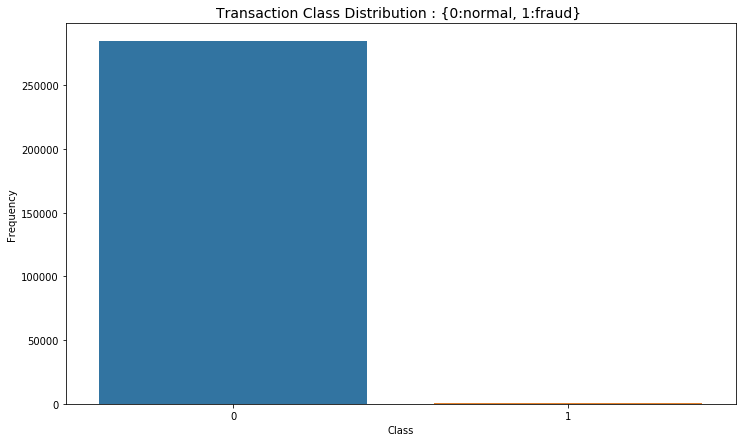

In [7]:
plt.figure(figsize = (12,7))
sns.countplot('Class', data= df)
plt.title("Transaction Class Distribution : {0:normal, 1:fraud} ", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
Fraud = df[df['Class']==1]

Normal = df[df['Class']==0]

In [10]:
Fraud.shape

(492, 31)

In [11]:
Normal.shape

(284315, 31)

In [12]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<Figure size 864x504 with 0 Axes>

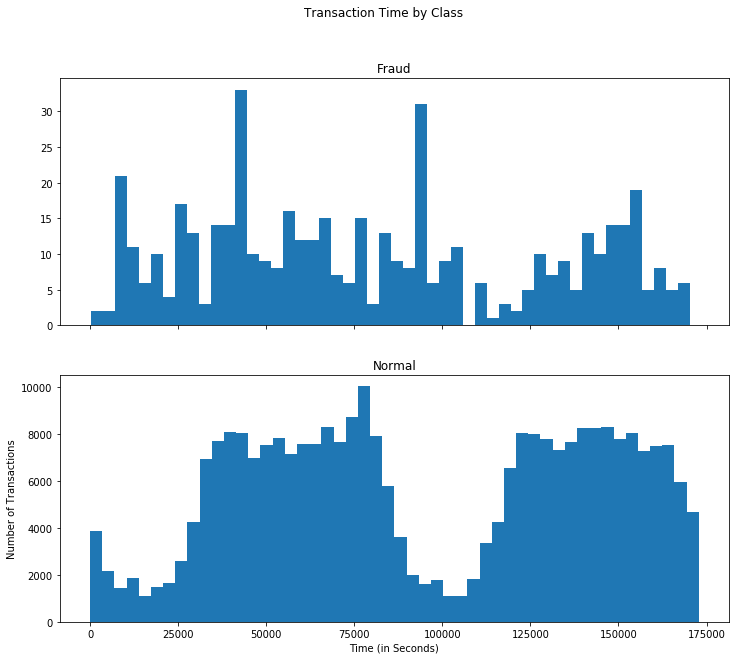

In [14]:
plt.figure(figsize = (12,7))
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 10))
f.suptitle('Transaction Time by Class')
bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

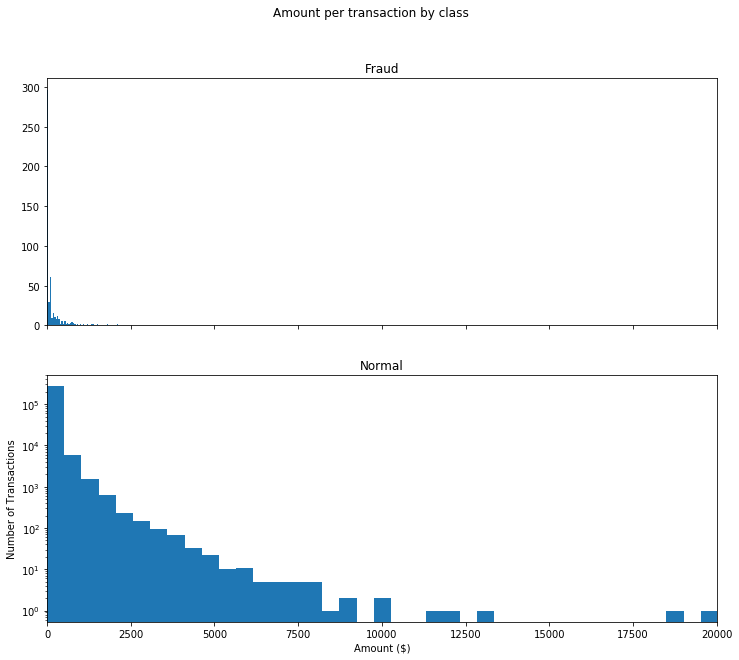

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 10))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

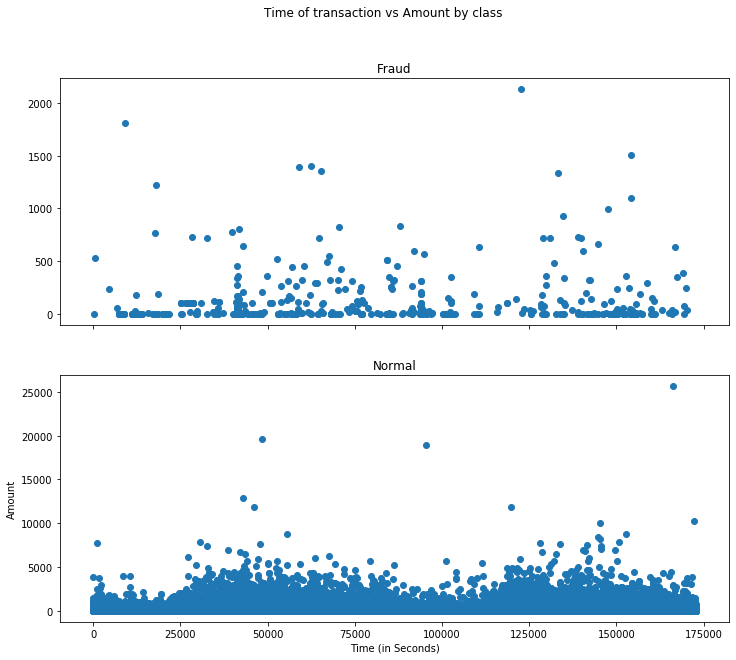

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 10))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Plot histogram of each parameter

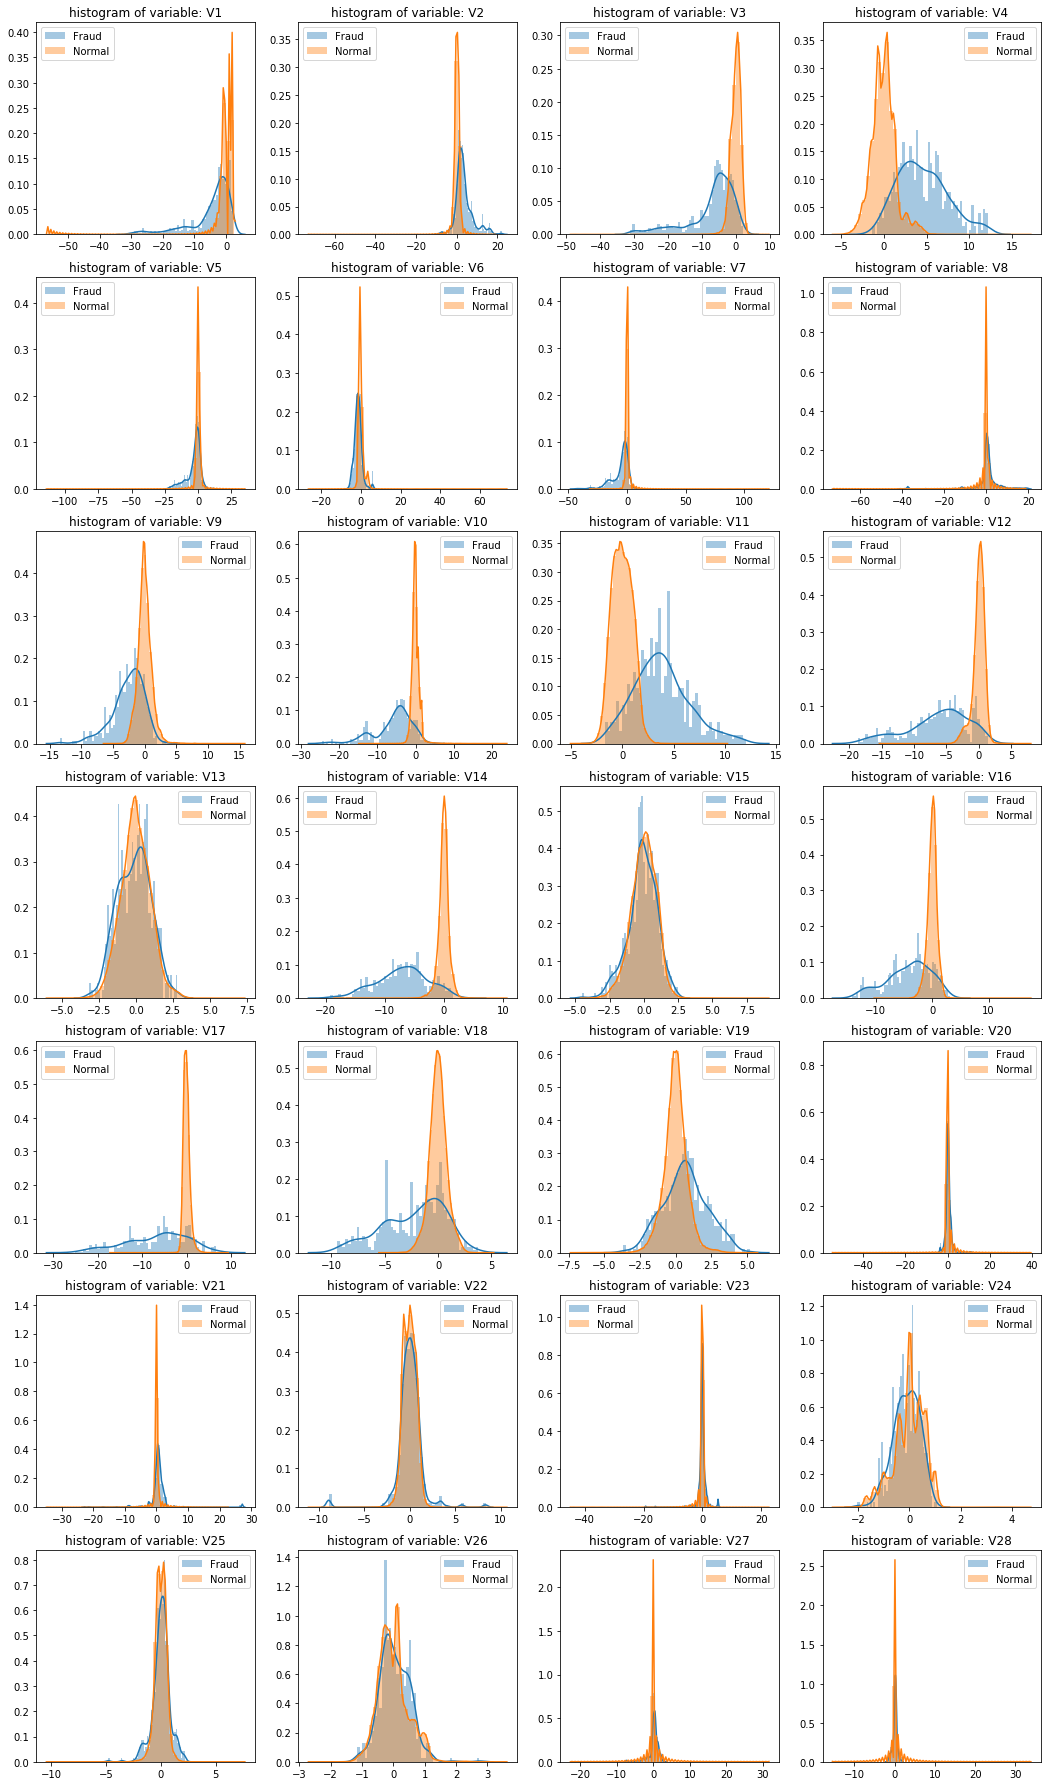

In [17]:
import matplotlib.gridspec as gridspec
variables = df.iloc[:,1:29].columns
plt.figure(figsize=(18,8*4))
gs = gridspec.GridSpec(7, 4)
for i, var in enumerate(df[variables]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[var][df.Class == 1], bins=50, label='Fraud')
    sns.distplot(df[var][df.Class == 0], bins=50, label='Normal')
    ax.set_xlabel('')
    ax.set_title('histogram of variable: ' + str(var))
    plt.legend(loc='best')
plt.show()

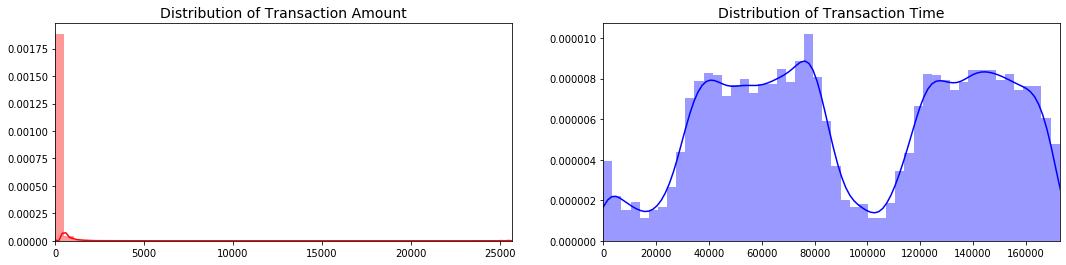

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

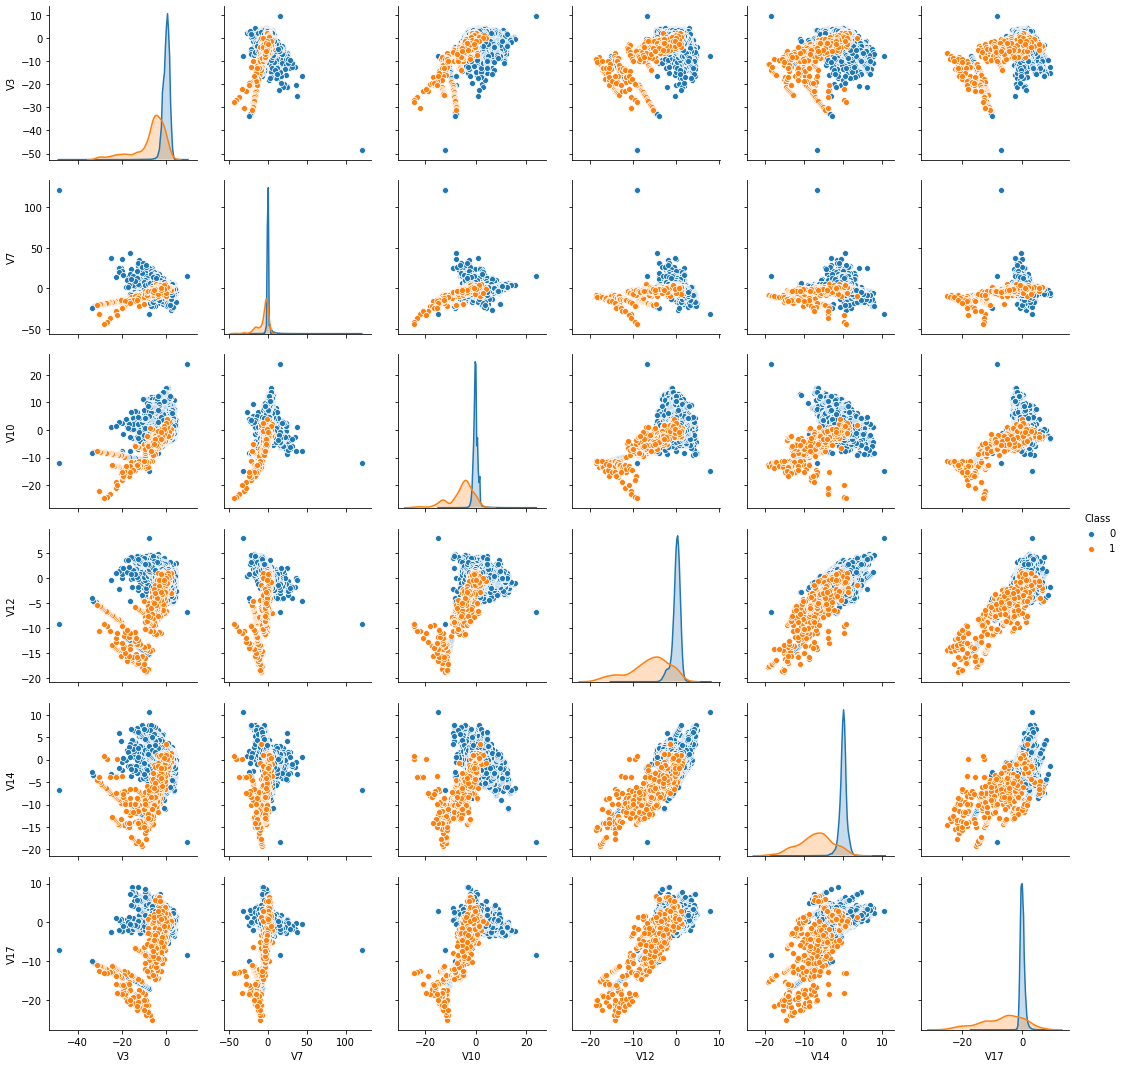

In [22]:
# To see the actual distribution of data 
sns.pairplot(df, hue = 'Class', vars = ['V3', 'V7', 'V10', 'V12','V14', 'V17'] )

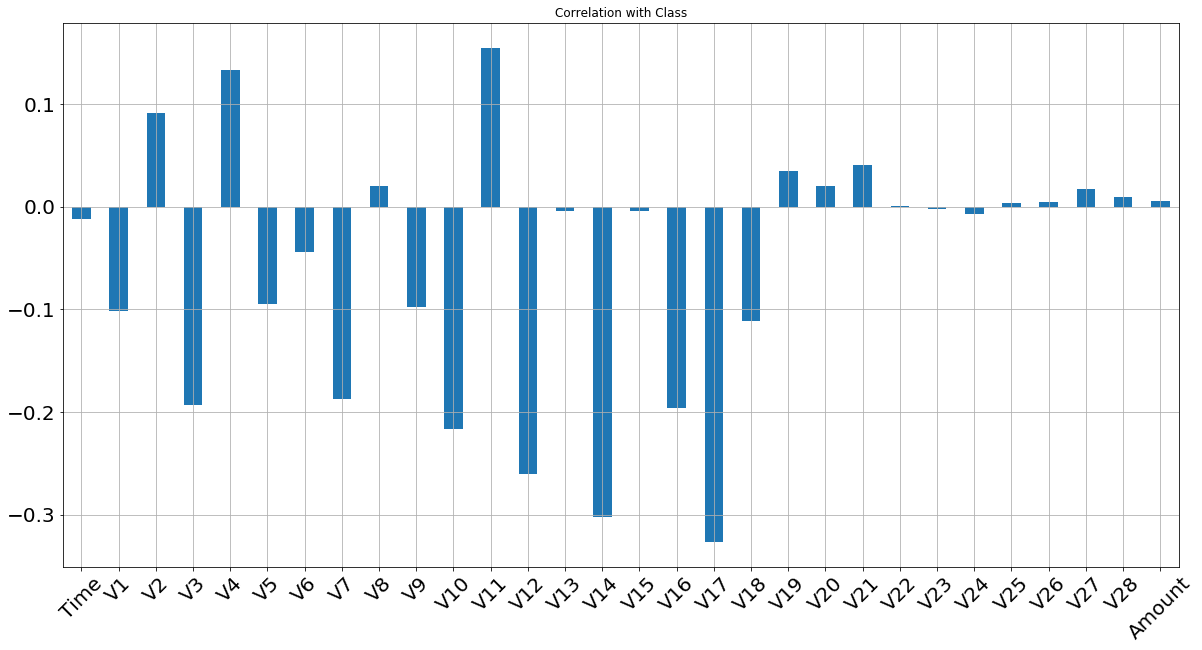

In [23]:
#finding correlation with target variable
rest_df = df.drop(columns = ['Class'])
rest_df.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class", fontsize = 20,
        rot = 45, grid = True)

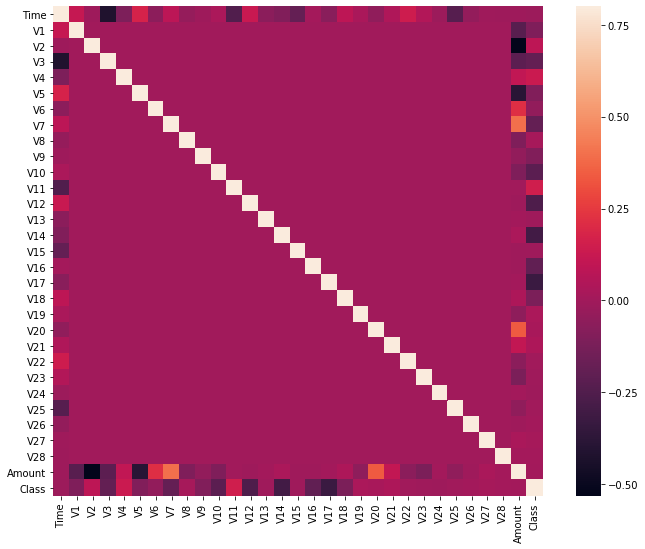

In [24]:
#plot correlation matrix
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [25]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'   
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Data Modeling

In [77]:
df1 = df.copy()

In [78]:
#spliting data into train and test datasets
from sklearn.model_selection import train_test_split
X = df1.drop('Class', axis=1)
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,
                                               random_state=42)

In [79]:
df1.shape

(284807, 31)

In [80]:
#normalize X_train and apply to X_test
#As all the features from V1 to V28 are already normalized, so we just have to normalize the Amount
from sklearn.preprocessing import StandardScaler, RobustScaler
# RobustScaler is less prone to outliers.

scaler = RobustScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['Amount'] = scaler.transform (X_test['Amount'].values.reshape(-1,1))
X_test['Time'] = scaler.fit_transform(X_test['Time'].values.reshape(-1,1))

In [81]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

#### Applying Auto-encoder model using tensorflow

In [82]:
# Parameters
learning_rate = 0.001
training_epochs = 10
batch_size = 256
display_step = 1

# Network Parameters
n_hidden_1 = 15 # 1st layer num features
#n_hidden_2 = 15 # 2nd layer num features
n_input = X_train.shape[1] # MNIST data input (img shape: 28*28)
data_dir = '.'

In [83]:
from sklearn.metrics import roc_auc_score 
from datetime import datetime
import os
warnings.filterwarnings("ignore")
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    #'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    #'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   #biases['encoder_b2']))
    return layer_1

# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                  # biases['decoder_b2']))
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define batch mse
batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# TRAIN StARTS
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    #run the initializer
    sess.run(init)
    total_batch = int(X_train.shape[0]/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_idx = np.random.choice(X_train.shape[0], batch_size)
            batch_xs = X_train[batch_idx]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            train_batch_mse = sess.run(batch_mse, feed_dict={X: X_train})
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c), 
                  "Train auc=", "{:.6f}".format(roc_auc_score(y_train, train_batch_mse)), 
                  "Time elapsed=", "{}".format(datetime.now() - now))

    print("Optimization Finished!")
    
    save_path = saver.save(sess, save_model)
    print("Model saved in file: %s" % save_path)
    

Epoch: 0001 cost= 1.200787306 Train auc= 0.943283 Time elapsed= 0:00:01.167903
Epoch: 0002 cost= 1.186791182 Train auc= 0.947216 Time elapsed= 0:00:02.237046
Epoch: 0003 cost= 0.907505274 Train auc= 0.945344 Time elapsed= 0:00:03.294193
Epoch: 0004 cost= 0.575014830 Train auc= 0.944730 Time elapsed= 0:00:04.322442
Epoch: 0005 cost= 0.826330006 Train auc= 0.945010 Time elapsed= 0:00:05.339752
Epoch: 0006 cost= 0.556963861 Train auc= 0.944819 Time elapsed= 0:00:06.356005
Epoch: 0007 cost= 0.848910987 Train auc= 0.944380 Time elapsed= 0:00:07.392237
Epoch: 0008 cost= 0.540385067 Train auc= 0.943983 Time elapsed= 0:00:08.416528
Epoch: 0009 cost= 1.159099340 Train auc= 0.943650 Time elapsed= 0:00:09.396889
Epoch: 0010 cost= 0.471708864 Train auc= 0.943539 Time elapsed= 0:00:10.424158
Optimization Finished!
Model saved in file: .\temp_saved_model_1layer.ckpt


In [84]:
# Test model
warnings.filterwarnings("ignore")
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    
    saver.restore(sess, save_model)
    
    test_batch_mse = sess.run(batch_mse, feed_dict={X: X_test})
    
    print("Test auc score: {:.6f}".format(roc_auc_score(y_test, test_batch_mse)))

Test auc score: 0.956477


In [34]:
smt = SMOTE(random_state=42, ratio=1.0)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [35]:
X_train_smt = pd.DataFrame(data = X_train_smt,columns=df1.drop('Class', axis=1).columns.tolist()) #change array to dataframe
y_train_smt = pd.DataFrame(data = y_train_smt,columns=['Class'])

In [36]:
y_train_smt.Class.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [37]:
X_train_smt.shape

(454902, 30)

In [38]:
X_test.shape

(56962, 30)

In [39]:
# As we have to supply the X test,X_Train,ytest,y_train into deep learning models so we have to convert it into numpy arrays.
X_train_smt = X_train_smt.values
y_train_smt = y_train_smt.values

#### Applying Keras Sequential model on SMOTE sampling data

In [40]:
from tensorflow import keras 
#import keras
from tensorflow.python.keras import backend as k
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
tf.logging.set_verbosity(tf.logging.ERROR)

In [41]:
model = Sequential([
     #First Layer
     Dense(units=16, input_dim=30, activation='relu'),
      #Second Layer
     Dense(units=24,activation='relu'),
     Dropout(0.5),
      #Third Layer
     Dense(20,activation='relu'),
     #Fourth Layer
     Dense(24,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid')      
    
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_smt,y_train_smt, batch_size=15, epochs=5)

Epoch 1/5
454902/454902 [==============================] - 24s 53us/step - loss: 0.0375 - acc: 0.9869
Epoch 2/5
454902/454902 [==============================] - 23s 51us/step - loss: 0.0150 - acc: 0.9960
Epoch 3/5
454902/454902 [==============================] - 24s 54us/step - loss: 0.0122 - acc: 0.9970
Epoch 4/5
454902/454902 [==============================] - 24s 52us/step - loss: 0.0108 - acc: 0.9975
Epoch 5/5
454902/454902 [==============================] - 25s 54us/step - loss: 0.0097 - acc: 0.9978


Confusion matrix, without normalization
[[56677   187]
 [   15    83]]


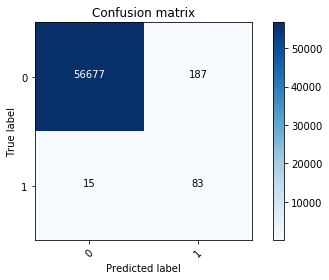


 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.85      0.45        98

    accuracy                           1.00     56962
   macro avg       0.65      0.92      0.72     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()
print("\n Classification report : \n", classification_report(y_expected,y_pred.round()))

In [44]:
#sample 0.1 of original dataset and then perform SMOTE sampling to make dataset balanced
df_sample = df.sample(frac = 0.1,random_state=1) #sample 0.1 data
X = df_sample.drop('Class', axis=1)
y = df_sample['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,
                                               random_state=42)
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = scaler.transform (X_test['Amount'].values.reshape(-1,1))
X_train['Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['Time'] = scaler.transform (X_test['Time'].values.reshape(-1,1))

#using SMOTE to perform oversampling
smt = SMOTE(random_state=42, ratio=1.0)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)
X_train_smt = pd.DataFrame(data = X_train_smt,columns=X.columns.tolist()) #change array to dataframe
y_train_smt = pd.DataFrame(data = y_train_smt,columns=['Class'])

#convert dataframe into arrays
X_train_smt = X_train_smt.values
X_test = X_test.values
y_train_smt = y_train_smt.values
y_test = y_test.values

In [64]:
from sklearn.metrics import classification_report,accuracy_score,precision_score, roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from inspect import signature

In [69]:
#function to evaluate model performance
def model_performance(algorithm,X_training,X_testing,y_training,y_testing):
    
    algorithm.fit(X_training, y_training)
    predictions = algorithm.predict(X_testing)
    probas = algorithm.predict_proba(X_testing)
    print(algorithm)
    print("\n Classification report : \n", classification_report(y_testing,predictions))
    print("Accuracy   Score : ", accuracy_score(y_testing,predictions))
    print("Recall Score :", recall_score(y_testing,predictions))
    print("Precision Score :", precision_score(y_testing,predictions))
    print("F1 Score :", f1_score(y_testing,predictions))                               
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_testing,probas[:,1]) 
    print ("AUC Score : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_testing,probas[:,1])
    #compute average precision and area under precision-recall curve
    average_precision = average_precision_score(y_testing, probas[:,1])
    print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
    precision, recall, _ = precision_recall_curve(y_testing, probas[:,1])
    area = auc(recall, precision)
    print('Area under Precision-Recall Curve: {0:0.2f}'.format(area))
    #confusion matrix
    conf_matrix = confusion_matrix(y_testing, predictions)
    print("Confusion Matrix : \n", conf_matrix)
    #draw precision-recall plot
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: \n Average Precision-Recall Score={0:0.2f}'.format(
          average_precision))

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import lightgbm as lgbm
from sklearn.metrics import classification_report,accuracy_score,precision_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score, confusion_matrix, roc_curve, precision_recall_curve

#### Using Logistic Regression model as Baseline model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5690
           1       0.04      0.71      0.08         7

    accuracy                           0.98      5697
   macro avg       0.52      0.85      0.54      5697
weighted avg       1.00      0.98      0.99      5697

Accuracy   Score :  0.9801649991223451
Recall Score : 0.7142857142857143
Precision Score : 0.04310344827586207
F1 Score : 0.0813008130081301
AUC Score :  0.9368064273160934 

Average precision-recall score: 0.35
Area under Precision-Recall Curve: 0.41
Confusion Matrix : 
 [[5579  111]
 [   2    5]]


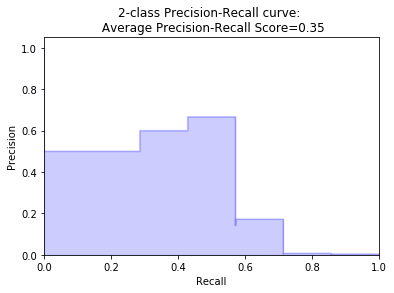

In [70]:
#using Logistic Regression model as Baseline model
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model_performance(logit,X_train_smt,X_test,y_train_smt,y_test)

From the report, we can see that the Auc score, recall score and accuracy score are good but the F1 score is too low(0.0813008130081301). As such, we need to improve the F1 score.

#### Grid Search with Logistic Regression

In [48]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_smt, y_train_smt)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5690
           1       0.05      0.71      0.09         7

    accuracy                           0.98      5697
   macro avg       0.52      0.85      0.54      5697
weighted avg       1.00      0.98      0.99      5697

Accuracy   Score :  0.9826224328593997
Recall Score : 0.7142857142857143
Precision Score : 0.049019607843137254
F1 Score : 0.09174311926605504
AUC Score :  0.9385387898568918 

Average precision-recall score: 0.34
Area under Precision-Recall Curve: 0.39
Confusion Matrix : 
 [[5593   97]
 [   2    5]]


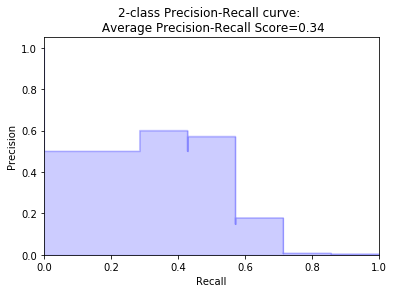

In [71]:
model_performance(log_reg,X_train_smt,X_test,y_train_smt,y_test)

#### Random Forest Model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.50      0.57      0.53         7

    accuracy                           1.00      5697
   macro avg       0.75      0.79      0.77      5697
weighted avg       1.00      1.00      1.00      5697

Accuracy   Score :  0.9987712831314727
Recall Score : 0.5714285714285714
Precision Score : 0.5
F1 Score : 0.5333333333333333
AUC Score :  0.91421039417524

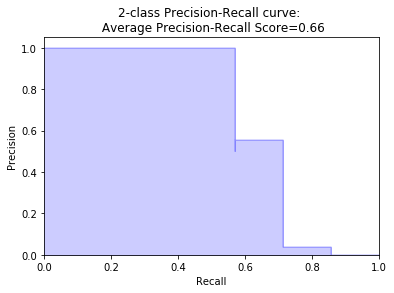

In [72]:
random_forest=RandomForestClassifier(n_estimators=100)
model_performance(random_forest,X_train_smt,X_test,y_train_smt,y_test)

<Figure size 864x504 with 0 Axes>

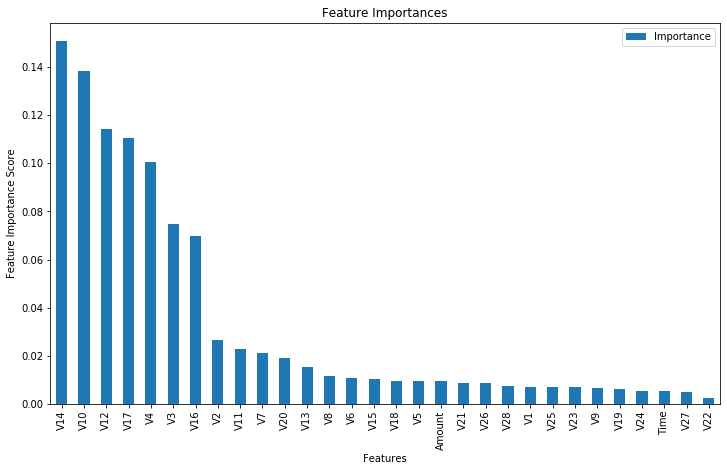

In [51]:
plt.figure(figsize=(12,7))
feat_imp = random_forest.feature_importances_
feat = X.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances', figsize = (12,7))
plt.ylabel('Feature Importance Score')
plt.show()

#### Grid Search with Random Forest

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)

In [54]:
grid_search.fit(X_train_smt, y_train_smt)
clf_best_model = grid_search.best_estimator_
print(clf_best_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.50      0.57      0.53         7

    accuracy                           1.00      5697
   macro avg       0.75      0.79      0.77      5697
weighted avg       1.00      1.00      1.00      5697

Accuracy   Score :  0.9987712831314727
Recall Score : 0.5714285714285714
Precision Score : 0.5
F1 Score : 0.5333333333333333
AUC Score :  0.8454305799648507 

Ave

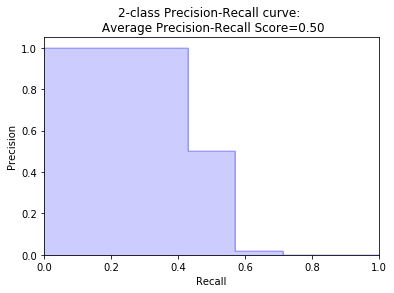

In [73]:
model_performance(clf_best_model,X_train_smt,X_test,y_train_smt,y_test)

#### LightGBM Model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=500, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.83      0.71      0.77         7

    accuracy                           1.00      5697
   macro avg       0.92      0.86      0.88      5697
weighted avg       1.00      1.00      1.00      5697

Accuracy   Score :  0.9994734070563455
Recall Score : 0.7142857142857143
Precision Score : 0.8333333333333334
F1 Score : 0.7692307692307692
AUC Score :  0.8811950790861159 

Average 

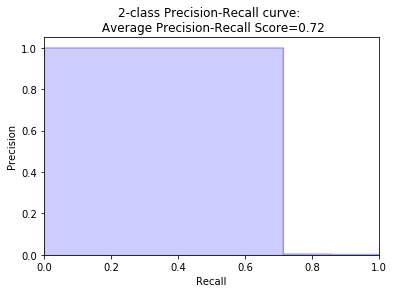

In [74]:
Lgb = lgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)
model_performance(Lgb,X_train_smt,X_test,y_train_smt,y_test)

#### Xgboost Model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=1,
              silent=True, subsample=1, verbosity=1)

 Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5690
           1       0.57      0.57      0.57         7

    accuracy                           1.00      5697
   macro avg       0.79      0.79      0.79      5697
weighted avg       1.00      1.00      1.00      5697

Accuracy   Score :  0.9989468141126909
Recall Score : 0.5714285714285714
Precision Score : 0.5714285714285714
F1 Score : 0.5714285714285714
AUC Score :  0.8869445141852875 

Aver

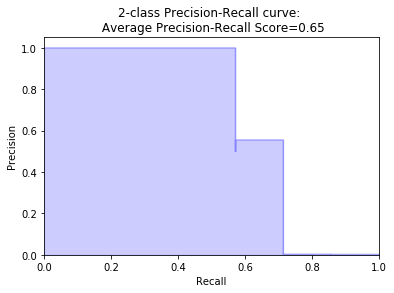

In [75]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = xgb.XGBClassifier(max_depth=7,
                           min_child_weight=1,
                           learning_rate=0.1,
                           n_estimators=500,
                           silent=True,
                           objective='binary:logistic',
                           gamma=0,
                           max_delta_step=0,
                           subsample=1,
                           colsample_bytree=1,
                           colsample_bylevel=1,
                           reg_alpha=0,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           seed=1,
                           missing=None)
model_performance(xgbc,X_train_smt,X_test,y_train_smt,y_test)

#### Visualize sample data uing T-SNE, PCA and TruncatedSVD

In [59]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

X = df_sample.drop('Class', axis=1)
y = df_sample['Class']

# T-SNE Implementation
t0 = time.time()

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.7e+02 s
PCA took 0.081 s
Truncated SVD took 0.057 s


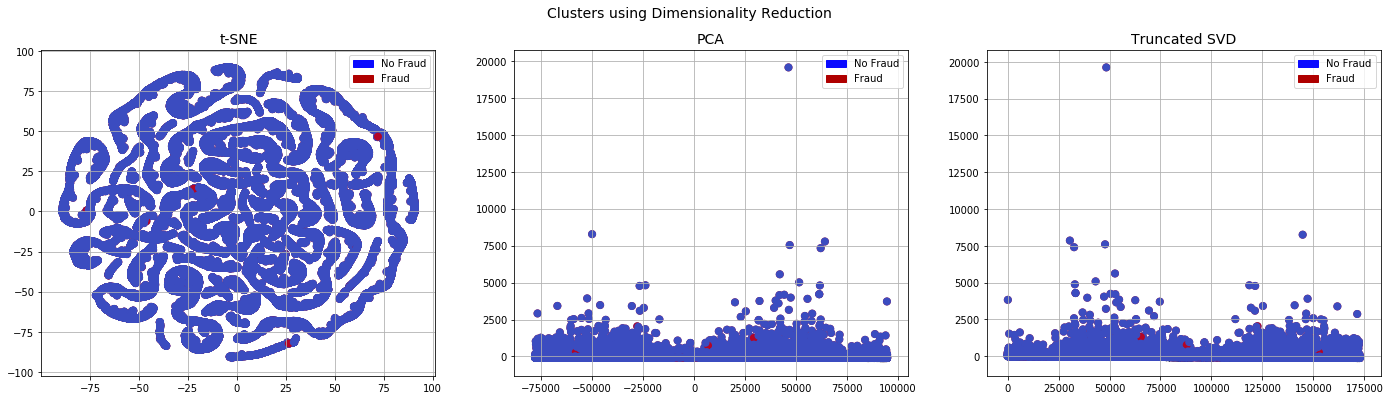

In [60]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()